In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_friedman1
from sklearn.model_selection import train_test_split, learning_curve, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.metrics import R2Score
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

In [3]:
tf.config.optimizer.set_jit(True) # Enable XLA.

In [4]:
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


## Random dataset generated

In [5]:
n_samples = 150000
n_features = 10
X, y = make_friedman1(n_samples=n_samples, n_features=n_features, noise=1.0)
X

array([[0.47776817, 0.22267333, 0.14798277, ..., 0.91861965, 0.57872723,
        0.80425945],
       [0.22839278, 0.39207739, 0.88802011, ..., 0.63168957, 0.25645186,
        0.93050362],
       [0.08213369, 0.79103721, 0.59325241, ..., 0.40631239, 0.5144497 ,
        0.05543955],
       ...,
       [0.14541021, 0.44536141, 0.7501219 , ..., 0.88995551, 0.74227425,
        0.27244906],
       [0.42543966, 0.15658958, 0.23832408, ..., 0.04475885, 0.36830782,
        0.95276811],
       [0.98639684, 0.2961437 , 0.21906909, ..., 0.3815944 , 0.41390605,
        0.13382539]])

## Split dataset into train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[0.23764021, 0.10562066, 0.77375388, ..., 0.29829799, 0.98955316,
        0.9953465 ],
       [0.18533493, 0.48547853, 0.93221551, ..., 0.53822505, 0.42367441,
        0.24674638],
       [0.92844805, 0.05143724, 0.17766726, ..., 0.59528027, 0.99535567,
        0.61197351],
       ...,
       [0.49106896, 0.76607504, 0.60877148, ..., 0.04406861, 0.74242652,
        0.96323736],
       [0.81965708, 0.30670201, 0.59417155, ..., 0.57675394, 0.73481823,
        0.19783395],
       [0.31112941, 0.04356882, 0.73126997, ..., 0.10605594, 0.77432303,
        0.15067706]])

In [7]:
train_df = pd.DataFrame(X_train)
train_y_df = pd.DataFrame(y_train, columns=['y'])
train_df = pd.concat([train_df.reset_index(drop=True), train_y_df.reset_index(drop=True)], axis=1)
train_df

,0,1,2,3,4,5,6,7,8,9,y
0,0.237640,0.105621,0.773754,0.631871,0.841460,0.011336,0.647461,0.298298,0.989553,0.995346,12.268371
1,0.185335,0.485479,0.932216,0.178741,0.587505,0.235341,0.943748,0.538225,0.423674,0.246746,10.248235
2,0.928448,0.051437,0.177667,0.043687,0.778743,0.608393,0.357004,0.595280,0.995356,0.611974,7.396639
3,0.577620,0.804609,0.966321,0.819908,0.609526,0.405498,0.401941,0.823955,0.163498,0.749694,26.157884
4,0.526354,0.126021,0.996933,0.740655,0.574083,0.784660,0.402005,0.430442,0.567492,0.759035,17.268757
...,...,...,...,...,...,...,...,...,...,...,...
119995,0.026951,0.270359,0.893262,0.657538,0.043304,0.698900,0.810960,0.170877,0.947863,0.988190,9.225214
119996,0.464350,0.529269,0.108624,0.317671,0.792693,0.654818,0.144528,0.008958,0.245436,0.098398,16.010426
119997,0.491069,0.766075,0.608771,0.012772,0.595214,0.809355,0.826631,0.044069,0.742427,0.963237,12.909545
119998,0.819657,0.306702,0.594172,0.708827,0.517163,0.315693,0.481322,0.576754,0.734818,0.197834,16.967444


<Axes: >

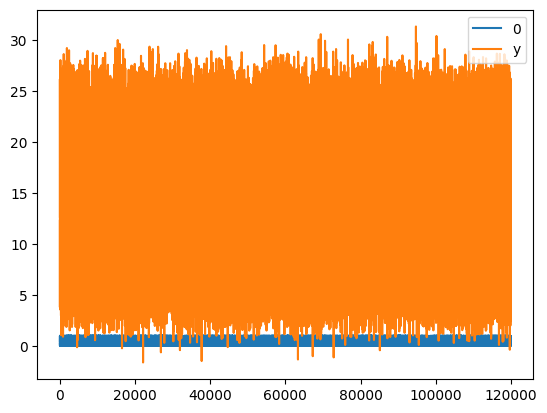

In [8]:
train_df[[0, 'y']].plot()

The data is clearly non-linear

## Lineral Regression

In [9]:
lr_model = LinearRegression()
history = lr_model.fit(X_train, y_train)
print(lr_model.score(X_test, y_test))

0.7248935238460352


In [10]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

6.853368412637686

<Axes: >

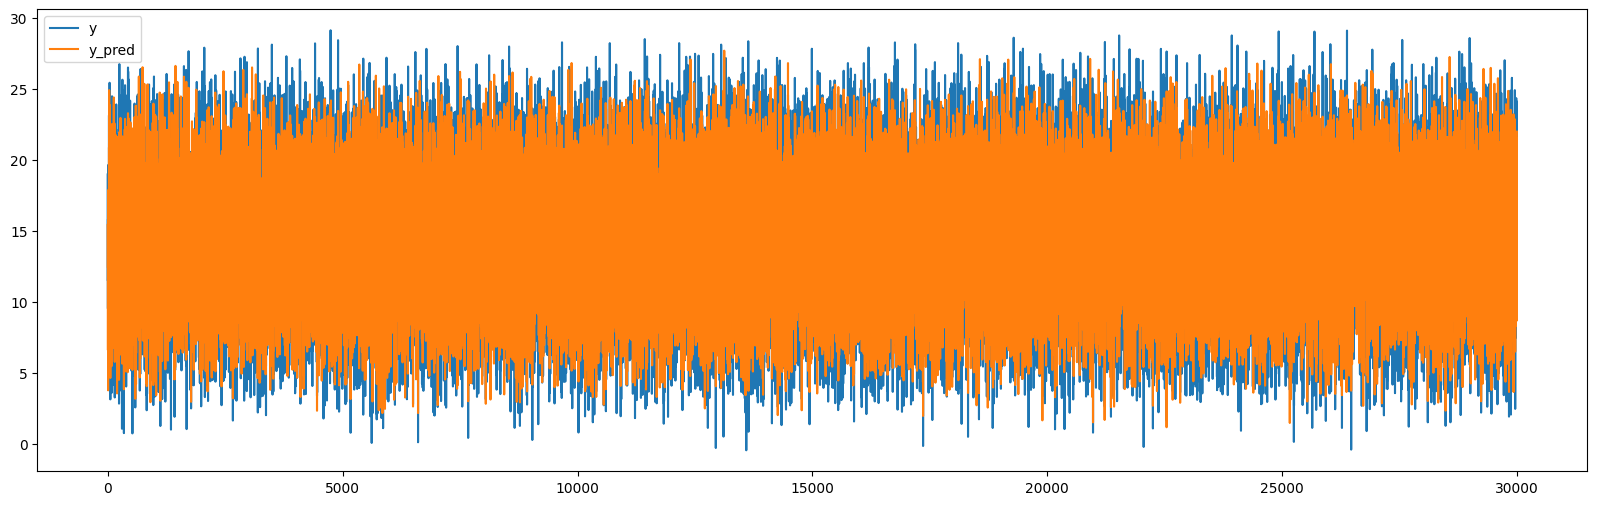

In [11]:
test_pred_df = pd.DataFrame(y_pred, columns=['y_pred'])
test_y_df = pd.DataFrame(y_test, columns=['y'])
test_df = pd.concat([test_pred_df.reset_index(drop=True), test_y_df.reset_index(drop=True)], axis=1)
test_df[['y', 'y_pred']].plot(figsize=(20, 6))

In [12]:
print(f'y = a * x + b = {lr_model.coef_} * x + {lr_model.intercept_}')

y = a * x + b = [ 6.71461071e+00  6.74874860e+00 -1.13353930e-02  9.96760761e+00
  4.98346464e+00 -4.80152787e-03  3.55107659e-02  2.54055157e-02
 -3.48075166e-03 -2.57983485e-02] * x + 0.197761793234422


In [13]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes_abs, train_scores, test_scores = learning_curve(lr_model, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error')


In [14]:
print('train_sizes_abs', train_sizes_abs)
print('train_scores', train_scores)
print('test_scores', test_scores)

train_sizes_abs [ 12000  39000  66000  93000 120000]
train_scores [[-6.99041874 -6.9495256  -6.8718017  -7.01752378 -6.95333462]
 [-6.97826726 -6.90635739 -6.91823934 -6.95586841 -6.92775796]
 [-6.93228204 -6.85261372 -6.89418681 -6.89180954 -6.89052558]
 [-6.93444973 -6.8919072  -6.91981339 -6.91529    -6.9171148 ]
 [-6.93364072 -6.89697031 -6.92535066 -6.91131363 -6.91990079]]
test_scores [[-6.85761156 -7.00796787 -6.89154647 -6.9430435  -6.91611581]
 [-6.85475318 -7.00177688 -6.88729493 -6.94407379 -6.91085355]
 [-6.85324489 -7.00081853 -6.88613835 -6.94401373 -6.91001863]
 [-6.8541364  -6.99964339 -6.88662651 -6.94269065 -6.90892201]
 [-6.85336841 -7.00035488 -6.88656001 -6.94274783 -6.90840081]]


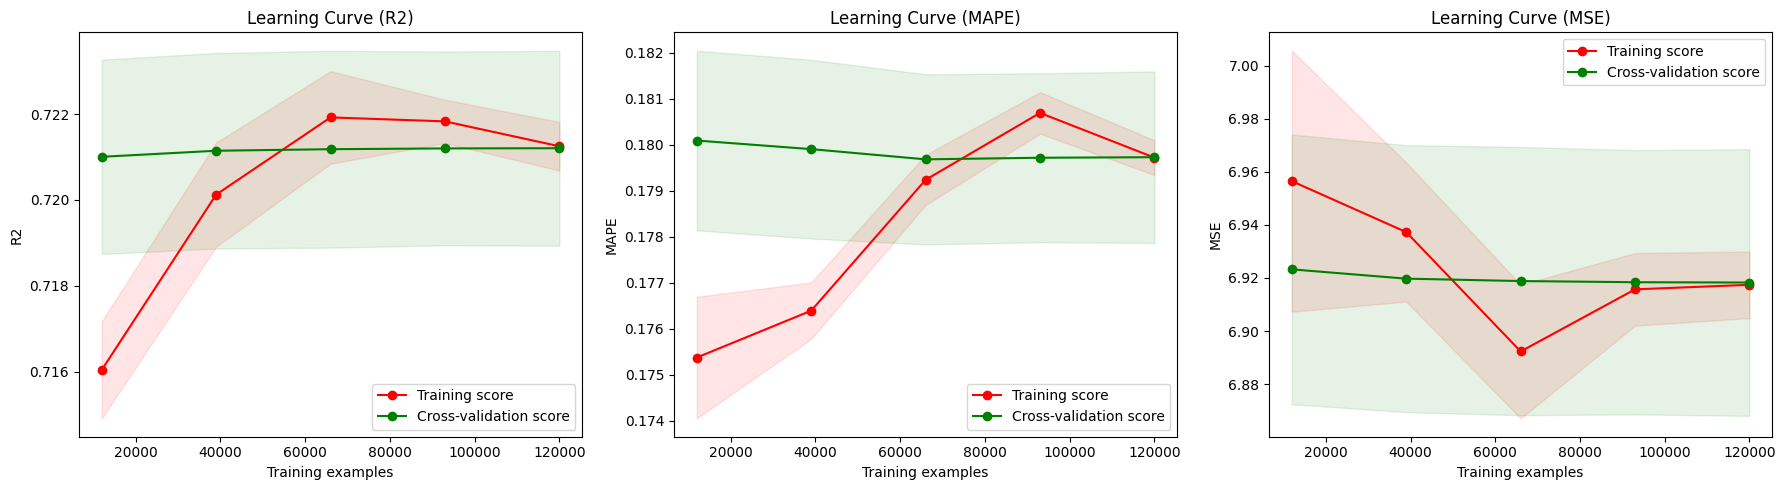

In [15]:
# Initialize plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['r2', 'mape', 'mse']
scorings = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']

# Loop through each metric
for idx, (metric, scoring) in enumerate(zip(metrics, scorings)):
    # Get train and test scores
    train_sizes, train_scores, test_scores = learning_curve(lr_model, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring=scoring)

    # Calculate means and standard deviations for train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Adjust scoring for display (if necessary)
    if scoring.startswith('neg_'):
        train_scores_mean = -train_scores_mean
        test_scores_mean = -test_scores_mean

    # Plot learning curves
    axs[idx].fill_between(train_sizes, train_scores_mean - train_scores_std,
                          train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axs[idx].fill_between(train_sizes, test_scores_mean - test_scores_std,
                          test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axs[idx].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axs[idx].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Set plot titles and labels
    axs[idx].set_title(f'Learning Curve ({metric.upper()})')
    axs[idx].set_xlabel('Training examples')
    axs[idx].set_ylabel(metric.upper())
    axs[idx].legend(loc="best")

# Show plot
plt.tight_layout()
plt.show()


### Results interpretation

## Neural Networks

In [54]:
layers_options = [1, 5, 25]
optimizers_options = {'SGD': SGD, 'RMSProp': RMSprop, 'Adam': Adam}
learning_rates = [0.1, 0.01, 0.001]
loss_function = 'mean_squared_error'

# layers_options = [1, 5, 25]
# optimizers_options = {'SGD': SGD, 'RMSProp': RMSprop, 'Adam': Adam}
# learning_rates = [0.1]
# loss_function = 'mean_squared_error'

In [55]:
def r2_keras(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

In [ ]:
def define_model(
    layers_num: int,
    Optimizer,
    learning_rate: float,
    loss_function: str = 'mean_squared_error',
    regularization_factor: float = 0.01
):
  model = Sequential()
  model.add(Input(
      shape=(X_train.shape[1],)
  ))
  # model.add(BatchNormalization())
  # model.add(Activation('relu'))

  for _ in range(layers_num ):
    model.add(
        Dense(
            units=64,
            activation='relu',
            # kernel_regularizer=l2(regularization_factor),
            # activity_regularizer=l2(regularization_factor),
        ))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))

  model.add(Dense(units=1))

  model.compile(
      optimizer=Optimizer(learning_rate=learning_rate),
      loss=loss_function,
      metrics=[R2Score, 'mape', 'mse']
  )

  return model

In [69]:
def plot_learning_curves(history, title):
    plt.figure(figsize=(10, 6))

    plt.plot(history.history['loss'], label='MSE (training loss)')
    plt.plot(history.history['mape'], label='MAPE')
    plt.plot(history.history['r2_score'], label='R^2')

    plt.plot(history.history['val_loss'], label='MSE (val loss)')
    plt.plot(history.history['val_mape'], label='MAPE (val)')
    plt.plot(history.history['val_r2_score'], label='R^2 (val)')

    plt.title(title)
    plt.ylabel('Loss / MAPE')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step - loss: 24.6662 - mape: 38.9050 - mse: 24.6662 - r2_score: 0.0096 - val_loss: 24.9127 - val_mape: 42.2639 - val_mse: 24.9127 - val_r2_score: -3.6597e-05
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1s 230us/step - loss: 24.8211 - mape: 40.6906 - mse: 24.8211 - r2_score: -0.0035 - val_loss: 24.9215 - val_mape: 42.5569 - val_mse: 24.9215 - val_r2_score: -3.8981e-04
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1s 224us/step - loss: 24.8004 - mape: 40.9394 - mse: 24.8004 - r2_score: -0.0033 - val_loss: 25.5930 - val_mape: 40.1928 - val_mse: 25.5930 - val_r2_score: -0.0273
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1s 226us/step - loss: 24.9562 - mape: 41.3093 - mse: 24.9562 - r2_score: -0.0038 - val_loss: 25.4210 - val_mape: 40.4306 - val_mse: 25.4210 - val_r2_score: -0.0204
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1s 230us/step - loss: 24.7148 - mape: 40.5434 - mse: 24.7148 - r2_score: -0.0038 - val_loss: 24.9495 - val_mape: 42.8532 - val_

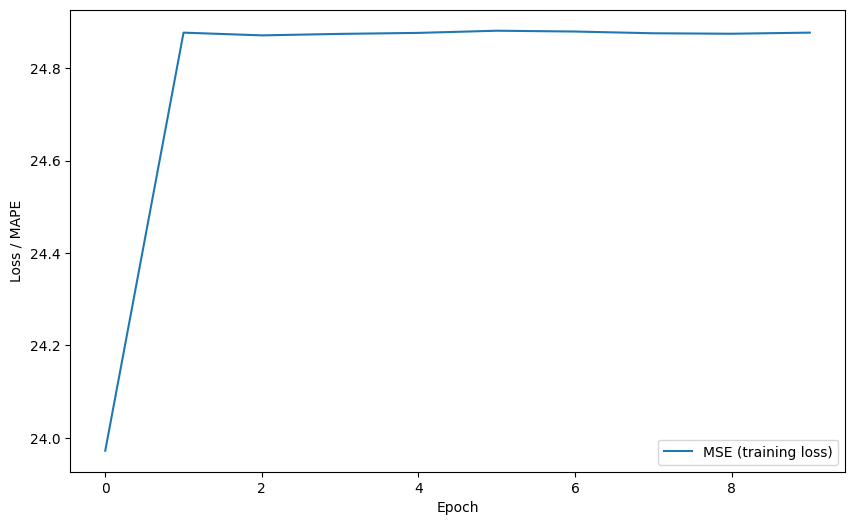

In [72]:
from keras import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))
model.compile(
    optimizer=SGD(learning_rate=0.1),
    loss='mean_squared_error',
    metrics=[R2Score, 'mape', 'mse']
)

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

print(history.history.keys())

plt.figure(figsize=(10, 6))
print(history.history['loss'])
plt.plot(history.history['loss'], label='MSE (training loss)')
plt.ylabel('Loss / MAPE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


****************************************************************************************************
Layers: 1, Optimizer: SGD, LR: 0.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - loss: 14.6433 - mape: 24.1828 - mse: 14.6433 - r2_score: 0.4114 - val_loss: 6.5696 - val_mape: 19.0948 - val_mse: 6.5696 - val_r2_score: 0.7363
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step - loss: 7.2933 - mape: 19.5960 - mse: 7.2933 - r2_score: 0.7066 - val_loss: 5.8898 - val_mape: 17.6086 - val_mse: 5.8898 - val_r2_score: 0.7636
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - loss: 7.1823 - mape: 19.7765 - mse: 7.1823 - r2_score: 0.7097 - val_loss: 6.9776 - val_mape: 18.4316 - val_mse: 6.9776 - val_r2_score: 0.7199
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step - loss: 7.1345 - mape: 19.4869 - mse: 7.1345 - r2_score: 0.7109 - val_loss: 7.0409 - val_mape: 22.3883 - val_mse: 7.0409 - val_r2_score: 0.7174
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - loss

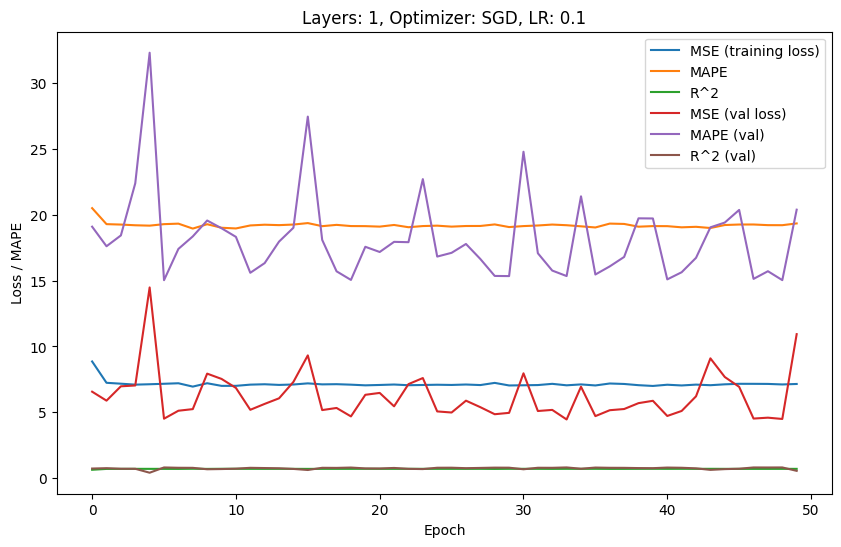

****************************************************************************************************
Layers: 1, Optimizer: SGD, LR: 0.01
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - loss: 9.3292 - mape: 17.7910 - mse: 9.3292 - r2_score: 0.6266 - val_loss: 2.0127 - val_mape: 9.7041 - val_mse: 2.0127 - val_r2_score: 0.9192
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 276us/step - loss: 2.6310 - mape: 10.9546 - mse: 2.6310 - r2_score: 0.8940 - val_loss: 1.8569 - val_mape: 9.8948 - val_mse: 1.8569 - val_r2_score: 0.9255
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - loss: 2.1908 - mape: 10.2408 - mse: 2.1908 - r2_score: 0.9115 - val_loss: 1.9761 - val_mape: 9.1449 - val_mse: 1.9761 - val_r2_score: 0.9207
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step - loss: 2.1224 - mape: 9.9208 - mse: 2.1224 - r2_score: 0.9146 - val_loss: 1.4388 - val_mape: 8.8133 - val_mse: 1.4388 - val_r2_score: 0.9422
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - loss: 2.13

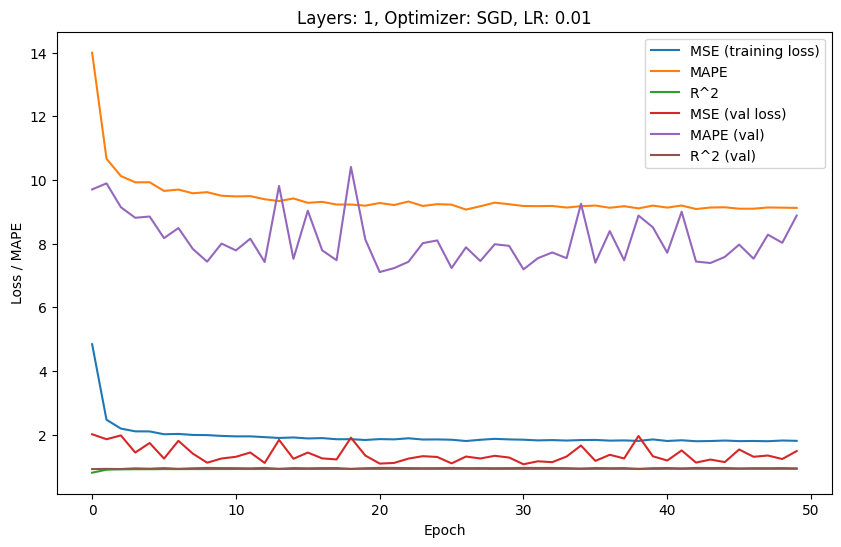

****************************************************************************************************
Layers: 1, Optimizer: SGD, LR: 0.001
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 341us/step - loss: 23.9313 - mape: 28.2974 - mse: 23.9313 - r2_score: 0.0316 - val_loss: 5.2248 - val_mape: 15.0982 - val_mse: 5.2248 - val_r2_score: 0.7903
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step - loss: 5.0634 - mape: 14.8872 - mse: 5.0634 - r2_score: 0.7960 - val_loss: 3.5324 - val_mape: 12.4809 - val_mse: 3.5324 - val_r2_score: 0.8582
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 292us/step - loss: 4.0331 - mape: 13.4535 - mse: 4.0331 - r2_score: 0.8379 - val_loss: 2.5384 - val_mape: 11.2247 - val_mse: 2.5384 - val_r2_score: 0.8981
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 280us/step - loss: 2.8127 - mape: 11.6382 - mse: 2.8127 - r2_score: 0.8862 - val_loss: 1.3982 - val_mape: 8.3257 - val_mse: 1.3982 - val_r2_score: 0.9439
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 311us/step - los

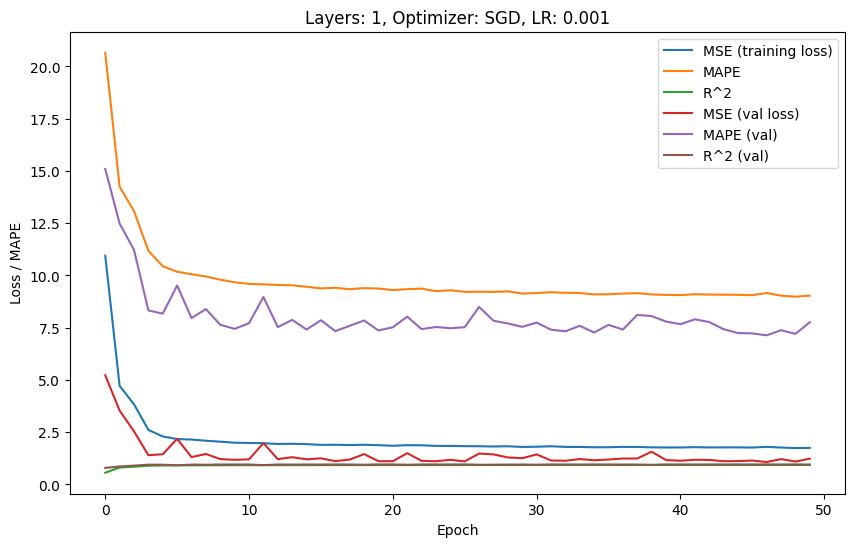

****************************************************************************************************
Layers: 1, Optimizer: RMSProp, LR: 0.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 372us/step - loss: 10.1488 - mape: 19.3025 - mse: 10.1488 - r2_score: 0.5871 - val_loss: 5.1790 - val_mape: 14.0602 - val_mse: 5.1790 - val_r2_score: 0.7921
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step - loss: 4.2027 - mape: 13.7171 - mse: 4.2027 - r2_score: 0.8302 - val_loss: 1.9576 - val_mape: 9.8603 - val_mse: 1.9576 - val_r2_score: 0.9214
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step - loss: 3.3316 - mape: 12.7083 - mse: 3.3316 - r2_score: 0.8661 - val_loss: 3.4497 - val_mape: 14.8557 - val_mse: 3.4497 - val_r2_score: 0.8615
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 302us/step - loss: 3.3517 - mape: 12.7691 - mse: 3.3517 - r2_score: 0.8643 - val_loss: 1.7880 - val_mape: 9.7493 - val_mse: 1.7880 - val_r2_score: 0.9282
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step - lo

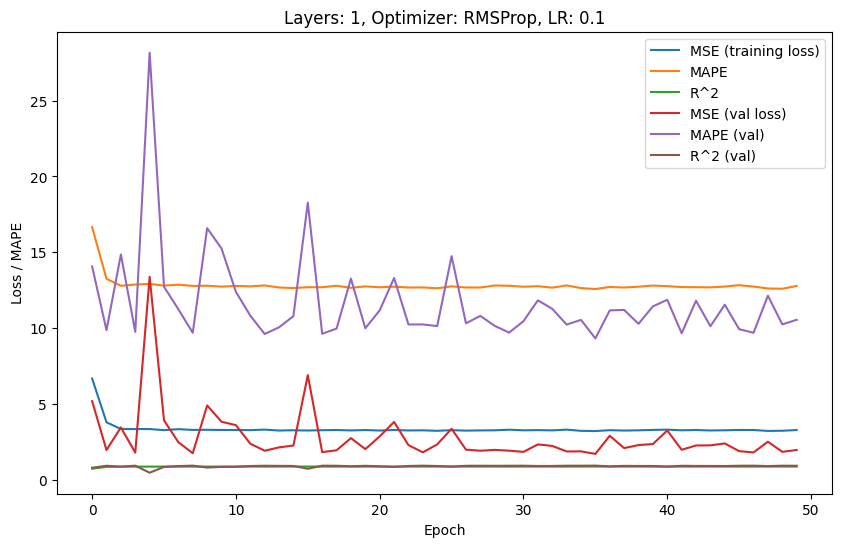

****************************************************************************************************
Layers: 1, Optimizer: RMSProp, LR: 0.01
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - loss: 11.8466 - mape: 17.6528 - mse: 11.8466 - r2_score: 0.5277 - val_loss: 1.3483 - val_mape: 7.8271 - val_mse: 1.3483 - val_r2_score: 0.9459
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - loss: 2.2174 - mape: 10.0045 - mse: 2.2174 - r2_score: 0.9105 - val_loss: 1.7422 - val_mape: 10.0053 - val_mse: 1.7422 - val_r2_score: 0.9301
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 288us/step - loss: 2.1858 - mape: 9.9363 - mse: 2.1858 - r2_score: 0.9118 - val_loss: 1.4138 - val_mape: 8.0109 - val_mse: 1.4138 - val_r2_score: 0.9432
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 288us/step - loss: 2.1026 - mape: 9.8528 - mse: 2.1026 - r2_score: 0.9150 - val_loss: 1.1922 - val_mape: 7.4751 - val_mse: 1.1922 - val_r2_score: 0.9521
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - loss

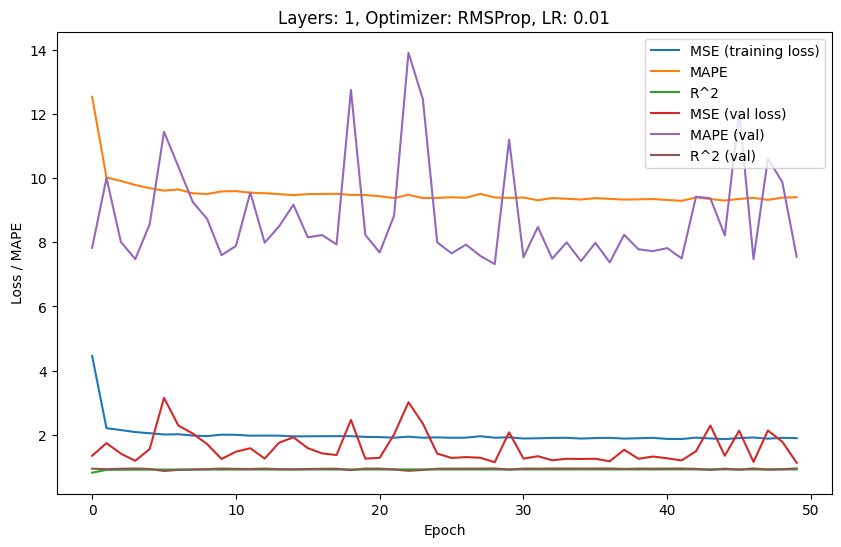

****************************************************************************************************
Layers: 1, Optimizer: RMSProp, LR: 0.001
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - loss: 53.8576 - mape: 40.7358 - mse: 53.8576 - r2_score: -1.1660 - val_loss: 3.2560 - val_mape: 11.7241 - val_mse: 3.2560 - val_r2_score: 0.8693
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 388us/step - loss: 3.5268 - mape: 12.5251 - mse: 3.5268 - r2_score: 0.8573 - val_loss: 1.7230 - val_mape: 9.2647 - val_mse: 1.7230 - val_r2_score: 0.9308
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - loss: 2.3095 - mape: 10.4272 - mse: 2.3095 - r2_score: 0.9070 - val_loss: 1.3121 - val_mape: 7.9484 - val_mse: 1.3121 - val_r2_score: 0.9473
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 296us/step - loss: 2.1257 - mape: 9.9676 - mse: 2.1257 - r2_score: 0.9145 - val_loss: 1.2669 - val_mape: 7.4841 - val_mse: 1.2669 - val_r2_score: 0.9491
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - l

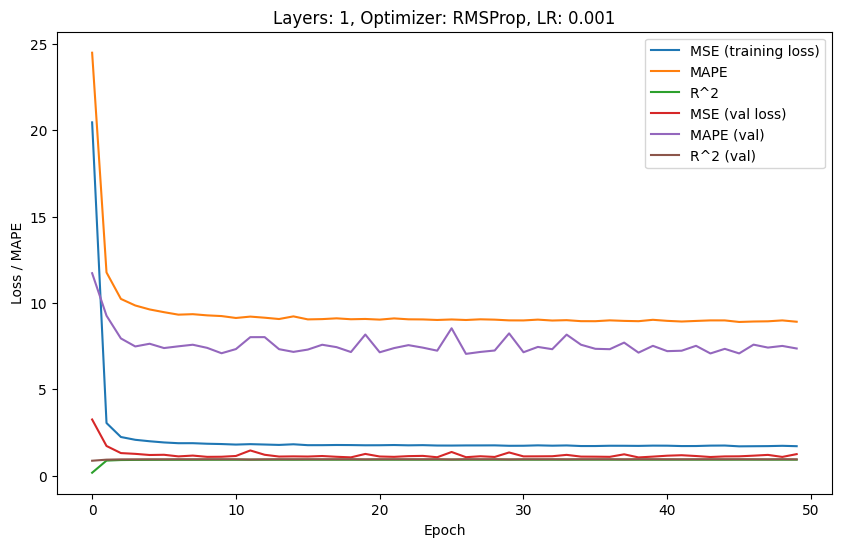

****************************************************************************************************
Layers: 1, Optimizer: Adam, LR: 0.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - loss: 8.9024 - mape: 18.0358 - mse: 8.9024 - r2_score: 0.6421 - val_loss: 3.6371 - val_mape: 14.2860 - val_mse: 3.6371 - val_r2_score: 0.8540
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - loss: 2.7093 - mape: 11.1929 - mse: 2.7093 - r2_score: 0.8911 - val_loss: 2.4297 - val_mape: 11.5510 - val_mse: 2.4297 - val_r2_score: 0.9025
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 315us/step - loss: 2.6058 - mape: 11.2327 - mse: 2.6058 - r2_score: 0.8953 - val_loss: 2.2816 - val_mape: 11.4186 - val_mse: 2.2816 - val_r2_score: 0.9084
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - loss: 2.5334 - mape: 10.9165 - mse: 2.5334 - r2_score: 0.8981 - val_loss: 2.9647 - val_mape: 12.4775 - val_mse: 2.9647 - val_r2_score: 0.8810
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - loss:

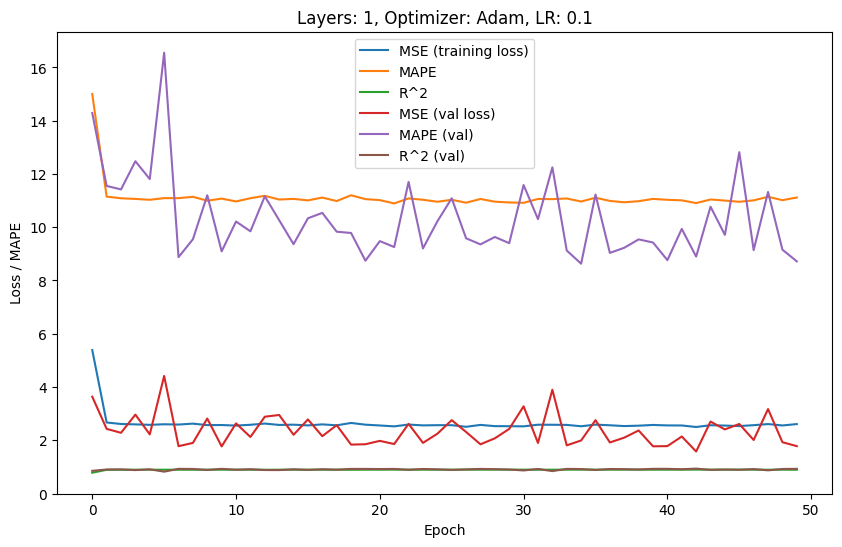

****************************************************************************************************
Layers: 1, Optimizer: Adam, LR: 0.01
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - loss: 15.0294 - mape: 21.2392 - mse: 15.0294 - r2_score: 0.4000 - val_loss: 3.0861 - val_mape: 10.7354 - val_mse: 3.0861 - val_r2_score: 0.8761
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 313us/step - loss: 2.2936 - mape: 10.4163 - mse: 2.2936 - r2_score: 0.9075 - val_loss: 2.4962 - val_mape: 10.0123 - val_mse: 2.4962 - val_r2_score: 0.8998
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step - loss: 2.1076 - mape: 9.9274 - mse: 2.1076 - r2_score: 0.9152 - val_loss: 1.7797 - val_mape: 10.5183 - val_mse: 1.7797 - val_r2_score: 0.9286
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - loss: 2.0722 - mape: 9.7337 - mse: 2.0722 - r2_score: 0.9161 - val_loss: 1.4533 - val_mape: 8.8745 - val_mse: 1.4533 - val_r2_score: 0.9417
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 309us/step - loss:

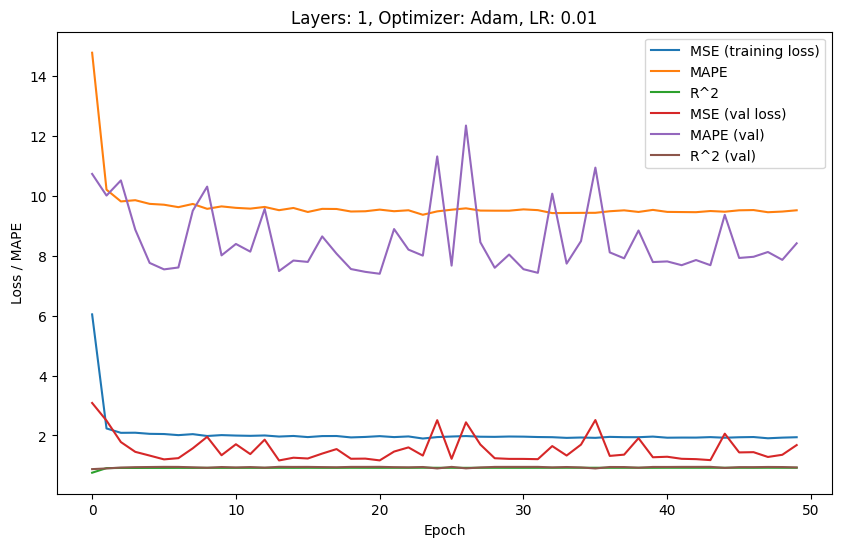

****************************************************************************************************
Layers: 1, Optimizer: Adam, LR: 0.001
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 350us/step - loss: 53.9722 - mape: 41.2199 - mse: 53.9722 - r2_score: -1.1703 - val_loss: 4.5364 - val_mape: 13.7656 - val_mse: 4.5364 - val_r2_score: 0.8179
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 306us/step - loss: 4.6894 - mape: 14.1437 - mse: 4.6894 - r2_score: 0.8105 - val_loss: 3.6389 - val_mape: 12.3874 - val_mse: 3.6389 - val_r2_score: 0.8539
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 307us/step - loss: 3.3473 - mape: 12.0773 - mse: 3.3473 - r2_score: 0.8644 - val_loss: 1.3626 - val_mape: 8.2326 - val_mse: 1.3626 - val_r2_score: 0.9453
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 305us/step - loss: 2.2603 - mape: 10.5135 - mse: 2.2603 - r2_score: 0.9094 - val_loss: 1.4151 - val_mape: 8.0119 - val_mse: 1.4151 - val_r2_score: 0.9432
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 310us/step - lo

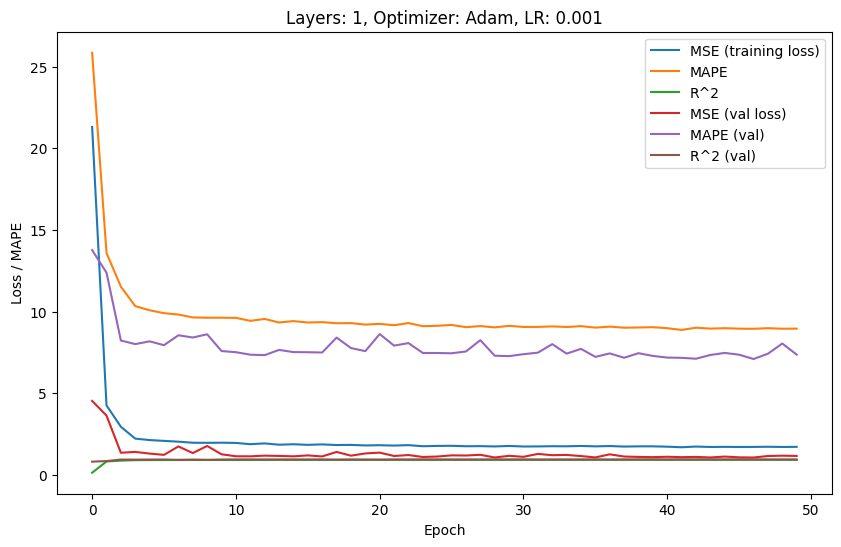

****************************************************************************************************
Layers: 5, Optimizer: SGD, LR: 0.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - loss: 25.6881 - mape: 35.7243 - mse: 25.6881 - r2_score: -0.0522 - val_loss: 14.1231 - val_mape: 31.2242 - val_mse: 14.1231 - val_r2_score: 0.4331
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - loss: 16.8831 - mape: 31.8392 - mse: 16.8831 - r2_score: 0.3174 - val_loss: 39.5133 - val_mape: 32.4135 - val_mse: 39.5133 - val_r2_score: -0.5861
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - loss: 17.8864 - mape: 33.1238 - mse: 17.8864 - r2_score: 0.2762 - val_loss: 24.9341 - val_mape: 41.8372 - val_mse: 24.9341 - val_r2_score: -8.9884e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - loss: 24.8033 - mape: 40.3797 - mse: 24.8033 - r2_score: -0.0018 - val_loss: 24.9163 - val_mape: 42.4656 - val_mse: 24.9163 - val_r2_score: -1.8549e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━

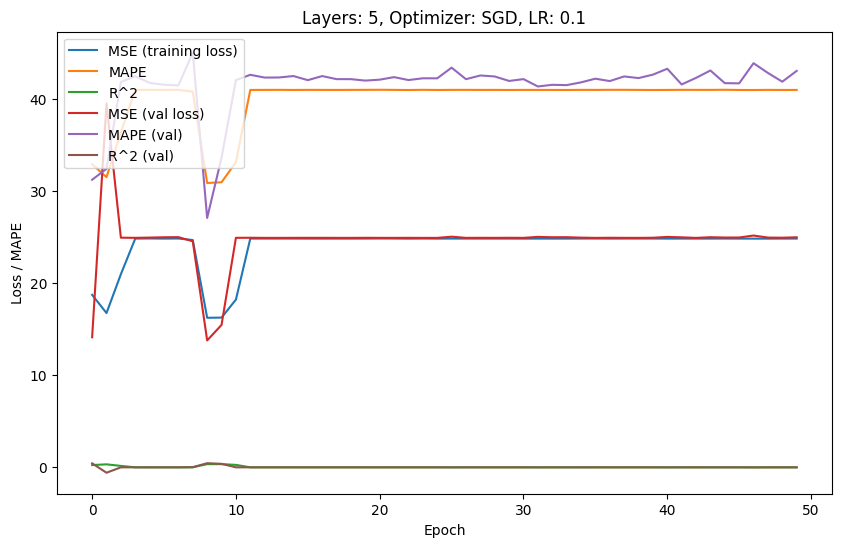

****************************************************************************************************
Layers: 5, Optimizer: SGD, LR: 0.01
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - loss: 11.4814 - mape: 19.0295 - mse: 11.4814 - r2_score: 0.5346 - val_loss: 1.8385 - val_mape: 9.4971 - val_mse: 1.8385 - val_r2_score: 0.9262
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - loss: 2.4250 - mape: 10.8187 - mse: 2.4250 - r2_score: 0.9022 - val_loss: 1.4104 - val_mape: 7.9489 - val_mse: 1.4104 - val_r2_score: 0.9434
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - loss: 2.2294 - mape: 10.4520 - mse: 2.2294 - r2_score: 0.9102 - val_loss: 1.4621 - val_mape: 8.3861 - val_mse: 1.4621 - val_r2_score: 0.9413
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 490us/step - loss: 2.1486 - mape: 10.0584 - mse: 2.1486 - r2_score: 0.9136 - val_loss: 1.7253 - val_mape: 8.5328 - val_mse: 1.7253 - val_r2_score: 0.9307
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - loss: 2

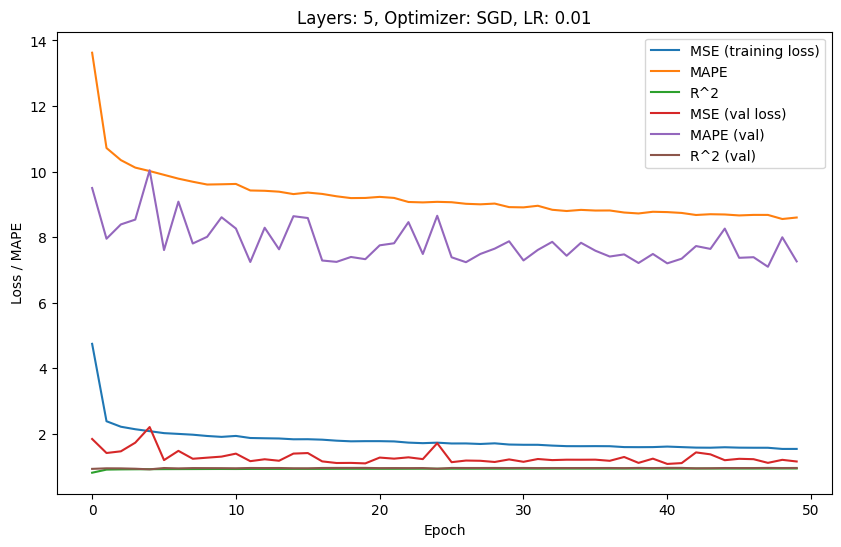

****************************************************************************************************
Layers: 5, Optimizer: SGD, LR: 0.001
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - loss: 32.1837 - mape: 32.6226 - mse: 32.1837 - r2_score: -0.3057 - val_loss: 2.4111 - val_mape: 11.6552 - val_mse: 2.4111 - val_r2_score: 0.9032
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - loss: 3.2259 - mape: 12.2465 - mse: 3.2259 - r2_score: 0.8693 - val_loss: 1.7365 - val_mape: 9.4044 - val_mse: 1.7365 - val_r2_score: 0.9303
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - loss: 2.5632 - mape: 11.1170 - mse: 2.5632 - r2_score: 0.8965 - val_loss: 1.5186 - val_mape: 8.4123 - val_mse: 1.5186 - val_r2_score: 0.9390
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - loss: 2.3627 - mape: 10.6567 - mse: 2.3627 - r2_score: 0.9047 - val_loss: 1.4550 - val_mape: 8.2770 - val_mse: 1.4550 - val_r2_score: 0.9416
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - loss

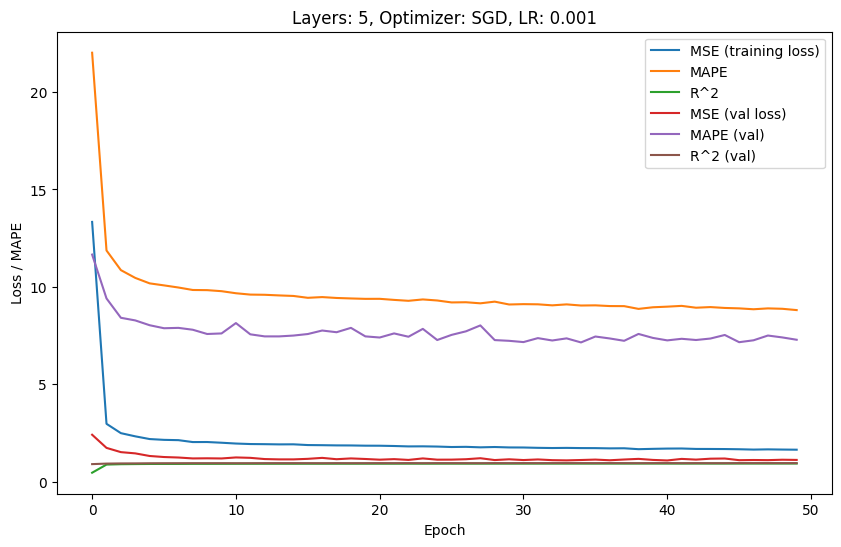

****************************************************************************************************
Layers: 5, Optimizer: RMSProp, LR: 0.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 644us/step - loss: 8.4052 - mape: 17.4732 - mse: 8.4052 - r2_score: 0.6638 - val_loss: 722391.7500 - val_mape: 460.4760 - val_mse: 722391.7500 - val_r2_score: -28997.1289
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - loss: 2.6089 - mape: 11.3091 - mse: 2.6089 - r2_score: 0.8943 - val_loss: 4.2225 - val_mape: 15.2866 - val_mse: 4.2225 - val_r2_score: 0.8305
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - loss: 2.4575 - mape: 10.8374 - mse: 2.4575 - r2_score: 0.9008 - val_loss: 6.3251 - val_mape: 15.4408 - val_mse: 6.3251 - val_r2_score: 0.7461
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - loss: 2.4049 - mape: 10.8137 - mse: 2.4049 - r2_score: 0.9031 - val_loss: 2.0874 - val_mape: 8.7976 - val_mse: 2.0874 - val_r2_score: 0.9162
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 

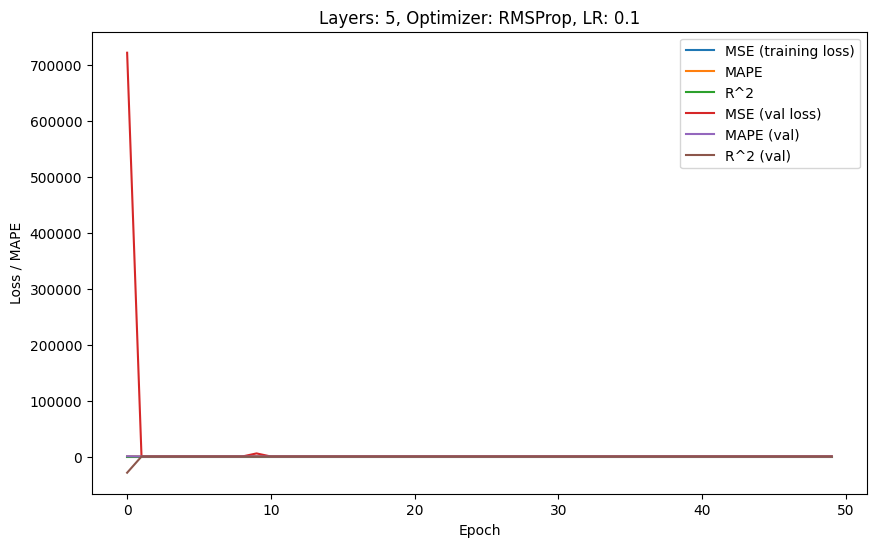

****************************************************************************************************
Layers: 5, Optimizer: RMSProp, LR: 0.01
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 724us/step - loss: 15.0874 - mape: 20.5149 - mse: 15.0874 - r2_score: 0.3861 - val_loss: 9.0759 - val_mape: 22.1412 - val_mse: 9.0759 - val_r2_score: 0.6357
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - loss: 2.3979 - mape: 10.6829 - mse: 2.3979 - r2_score: 0.9033 - val_loss: 1.7399 - val_mape: 9.0245 - val_mse: 1.7399 - val_r2_score: 0.9302
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - loss: 2.1580 - mape: 10.1587 - mse: 2.1580 - r2_score: 0.9129 - val_loss: 488.9952 - val_mape: 134.0872 - val_mse: 488.9952 - val_r2_score: -18.6292
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - loss: 2.0739 - mape: 9.9897 - mse: 2.0739 - r2_score: 0.9160 - val_loss: 4.6048 - val_mape: 19.7645 - val_mse: 4.6048 - val_r2_score: 0.8152
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/s

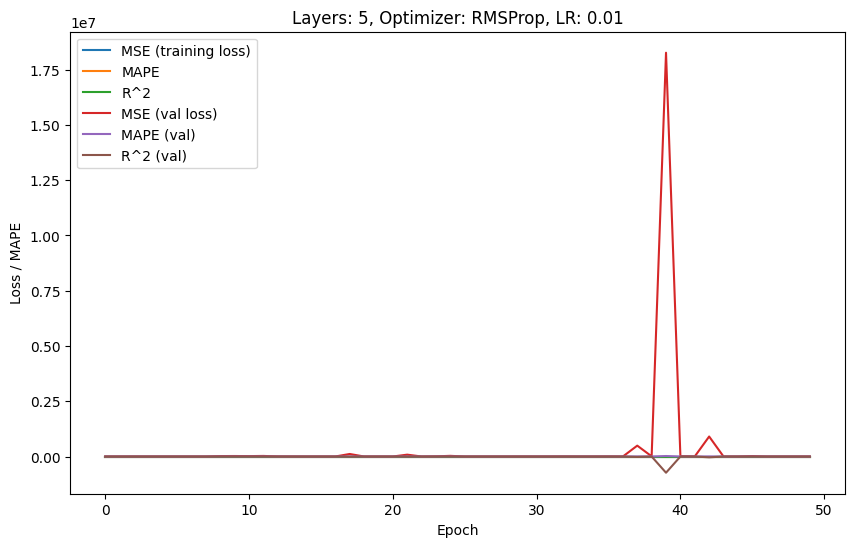

****************************************************************************************************
Layers: 5, Optimizer: RMSProp, LR: 0.001
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 644us/step - loss: 59.6309 - mape: 44.3848 - mse: 59.6309 - r2_score: -1.4016 - val_loss: 4.5117 - val_mape: 16.2064 - val_mse: 4.5117 - val_r2_score: 0.8189
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 575us/step - loss: 3.3095 - mape: 12.6912 - mse: 3.3095 - r2_score: 0.8666 - val_loss: 2.0455 - val_mape: 10.6764 - val_mse: 2.0455 - val_r2_score: 0.9179
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - loss: 2.2313 - mape: 10.1978 - mse: 2.2313 - r2_score: 0.9094 - val_loss: 2.0579 - val_mape: 9.2490 - val_mse: 2.0579 - val_r2_score: 0.9174
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - loss: 2.0884 - mape: 9.7965 - mse: 2.0884 - r2_score: 0.9155 - val_loss: 1.4633 - val_mape: 8.1837 - val_mse: 1.4633 - val_r2_score: 0.9413
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - 

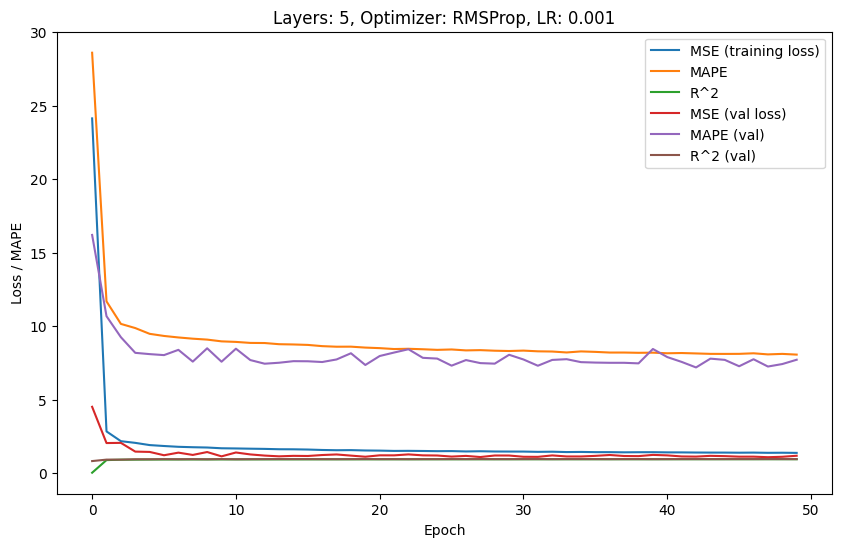

****************************************************************************************************
Layers: 5, Optimizer: Adam, LR: 0.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 685us/step - loss: 11.7287 - mape: 21.6084 - mse: 11.7287 - r2_score: 0.5325 - val_loss: 18.1323 - val_mape: 26.2864 - val_mse: 18.1323 - val_r2_score: 0.2721
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 592us/step - loss: 4.5929 - mape: 15.1912 - mse: 4.5929 - r2_score: 0.8141 - val_loss: 392.7830 - val_mape: 34.9624 - val_mse: 392.7830 - val_r2_score: -14.7670
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - loss: 4.5638 - mape: 15.3902 - mse: 4.5638 - r2_score: 0.8168 - val_loss: 17763.6445 - val_mape: 484.0323 - val_mse: 17763.6445 - val_r2_score: -712.0653
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - loss: 4.3790 - mape: 14.9403 - mse: 4.3790 - r2_score: 0.8225 - val_loss: 4.5966 - val_mape: 15.7571 - val_mse: 4.5966 - val_r2_score: 0.8155
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━

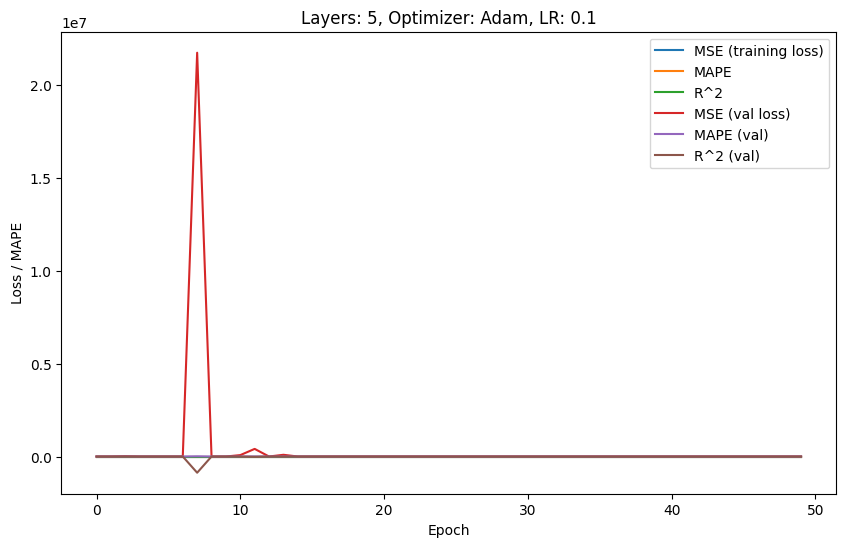

****************************************************************************************************
Layers: 5, Optimizer: Adam, LR: 0.01
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 666us/step - loss: 19.0023 - mape: 23.3937 - mse: 19.0023 - r2_score: 0.2364 - val_loss: 2.5758 - val_mape: 11.3925 - val_mse: 2.5758 - val_r2_score: 0.8966
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - loss: 2.3403 - mape: 10.3812 - mse: 2.3403 - r2_score: 0.9052 - val_loss: 2.3540 - val_mape: 10.5014 - val_mse: 2.3540 - val_r2_score: 0.9055
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 620us/step - loss: 2.3024 - mape: 10.6026 - mse: 2.3024 - r2_score: 0.9073 - val_loss: 4.4502 - val_mape: 13.4903 - val_mse: 4.4502 - val_r2_score: 0.8214
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - loss: 2.1053 - mape: 10.0660 - mse: 2.1053 - r2_score: 0.9151 - val_loss: 2.1762 - val_mape: 10.0375 - val_mse: 2.1762 - val_r2_score: 0.9126
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - lo

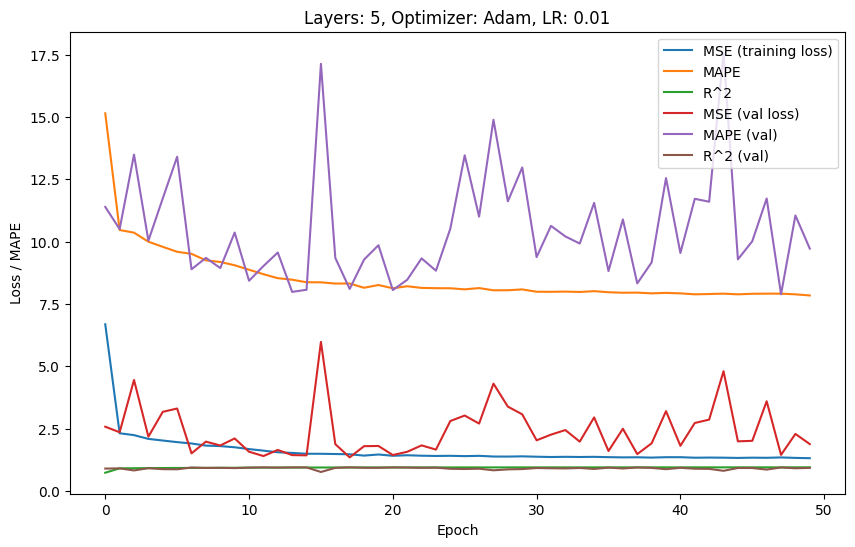

****************************************************************************************************
Layers: 5, Optimizer: Adam, LR: 0.001
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 666us/step - loss: 78.9637 - mape: 50.5882 - mse: 78.9637 - r2_score: -2.1589 - val_loss: 5.8570 - val_mape: 20.1236 - val_mse: 5.8570 - val_r2_score: 0.7649
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - loss: 4.5264 - mape: 15.2102 - mse: 4.5264 - r2_score: 0.8177 - val_loss: 2.5374 - val_mape: 11.2690 - val_mse: 2.5374 - val_r2_score: 0.8981
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - loss: 2.5682 - mape: 11.2377 - mse: 2.5682 - r2_score: 0.8963 - val_loss: 1.4512 - val_mape: 8.8651 - val_mse: 1.4512 - val_r2_score: 0.9417
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - loss: 2.2402 - mape: 10.3597 - mse: 2.2402 - r2_score: 0.9095 - val_loss: 1.7112 - val_mape: 8.6908 - val_mse: 1.7112 - val_r2_score: 0.9313
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - lo

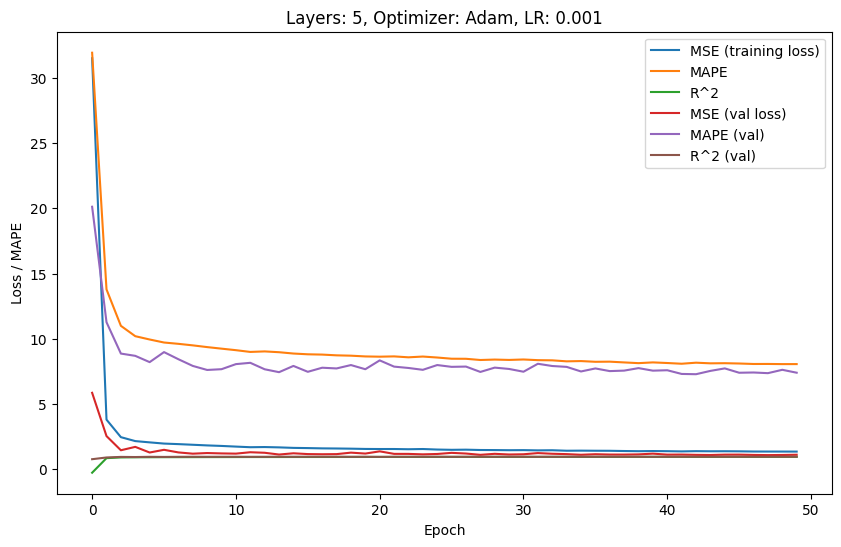

****************************************************************************************************
Layers: 25, Optimizer: SGD, LR: 0.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 29.3298 - mape: 41.5743 - mse: 29.3298 - r2_score: -0.1930 - val_loss: nan - val_mape: nan - val_mse: nan - val_r2_score: nan
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23.8725 - mape: 40.1125 - mse: 23.8725 - r2_score: 0.0386 - val_loss: nan - val_mape: nan - val_mse: nan - val_r2_score: nan
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23.9125 - mape: 39.7342 - mse: 23.9125 - r2_score: 0.0349 - val_loss: nan - val_mape: nan - val_mse: nan - val_r2_score: nan
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23.9057 - mape: 39.9422 - mse: 23.9057 - r2_score: 0.0365 - val_loss: nan - val_mape: nan - val_mse: nan - val_r2_score: nan
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23.6301 - mape: 39.3297 - mse: 23.6301 - r2_score: 0

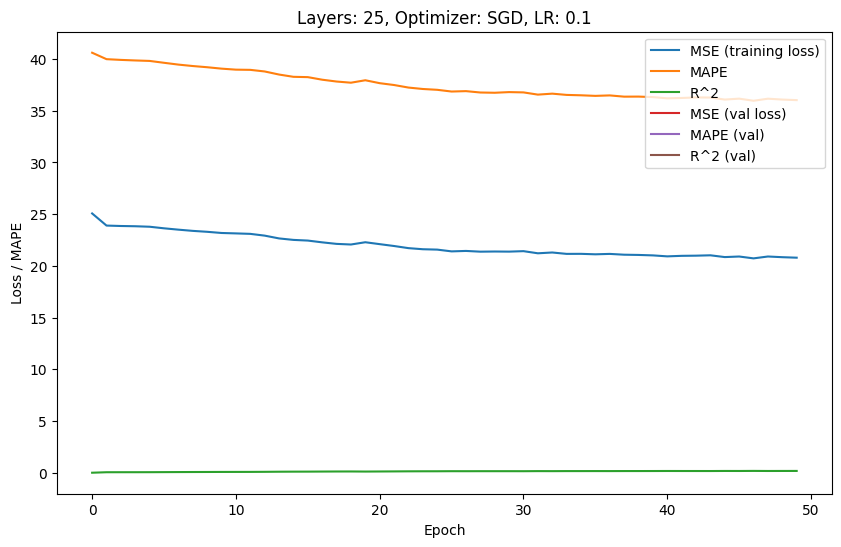

****************************************************************************************************
Layers: 25, Optimizer: SGD, LR: 0.01
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 29.1740 - mape: 40.4037 - mse: 29.1740 - r2_score: -0.1792 - val_loss: nan - val_mape: nan - val_mse: nan - val_r2_score: nan
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 21.9914 - mape: 38.1025 - mse: 21.9914 - r2_score: 0.1113 - val_loss: inf - val_mape: inf - val_mse: inf - val_r2_score: 0.0000e+00
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20.9196 - mape: 36.0312 - mse: 20.9196 - r2_score: 0.1535 - val_loss: nan - val_mape: nan - val_mse: nan - val_r2_score: nan
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 19.2367 - mape: 34.2361 - mse: 19.2367 - r2_score: 0.2225 - val_loss: inf - val_mape: inf - val_mse: inf - val_r2_score: 0.0000e+00
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18.3955 - mape: 33.3865 - mse: 18.395

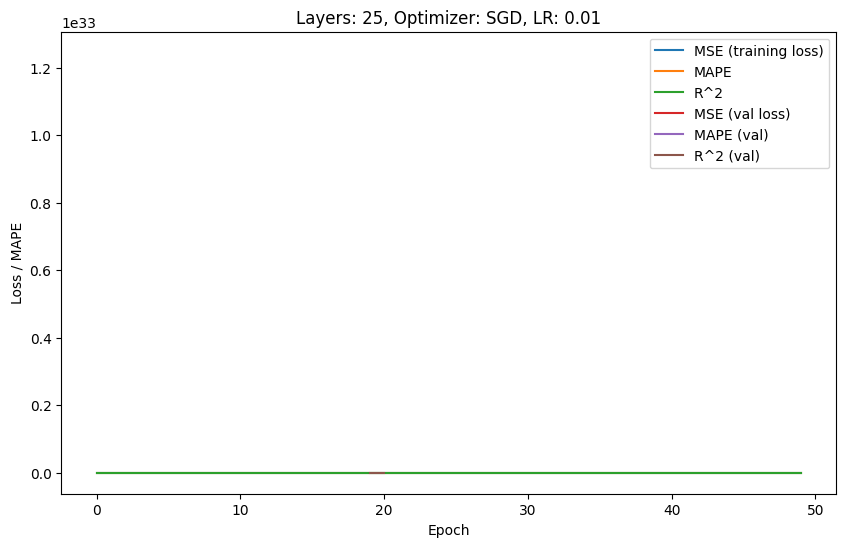

****************************************************************************************************
Layers: 25, Optimizer: SGD, LR: 0.001
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 46.0093 - mape: 44.9649 - mse: 46.0093 - r2_score: -0.8506 - val_loss: inf - val_mape: 22595881137008411672576.0000 - val_mse: inf - val_r2_score: 0.0000e+00
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23.3123 - mape: 38.5208 - mse: 23.3123 - r2_score: 0.0577 - val_loss: inf - val_mape: 19475330199803953938432.0000 - val_mse: inf - val_r2_score: 0.0000e+00
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.6135 - mape: 38.4008 - mse: 22.6135 - r2_score: 0.0925 - val_loss: inf - val_mape: 20770004754482100961280.0000 - val_mse: inf - val_r2_score: 0.0000e+00
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 21.6591 - mape: 36.8833 - mse: 21.6591 - r2_score: 0.1259 - val_loss: inf - val_mape: 54503467913962844061696.0000 - val_mse: inf - val_r2_sc

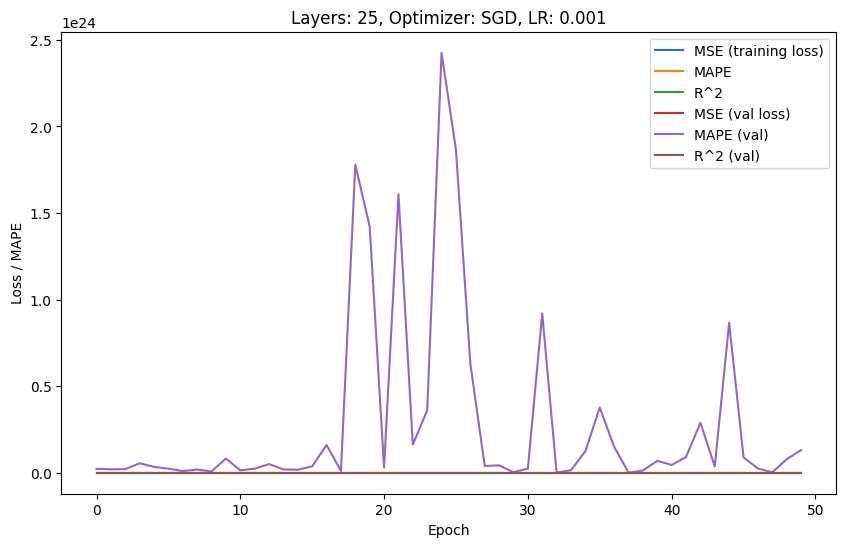

****************************************************************************************************
Layers: 25, Optimizer: RMSProp, LR: 0.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 23.7579 - mape: 35.9808 - mse: 23.7579 - r2_score: 0.0390 - val_loss: 2457527903838229495808.0000 - val_mape: 57713020928.0000 - val_mse: 2457527903838229495808.0000 - val_r2_score: -98649678579876495360.0000
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.1324 - mape: 23.0636 - mse: 10.1324 - r2_score: 0.5922 - val_loss: 22.3899 - val_mape: 35.3736 - val_mse: 22.3899 - val_r2_score: 0.1012
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.9931 - mape: 23.0135 - mse: 9.9931 - r2_score: 0.5964 - val_loss: 29.7805 - val_mape: 38.1652 - val_mse: 29.7805 - val_r2_score: -0.1954
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9.8839 - mape: 23.4615 - mse: 9.8839 - r2_score: 0.6009 - val_loss: 382184111289944841912320.0000 - val_mape: 47820759040.0

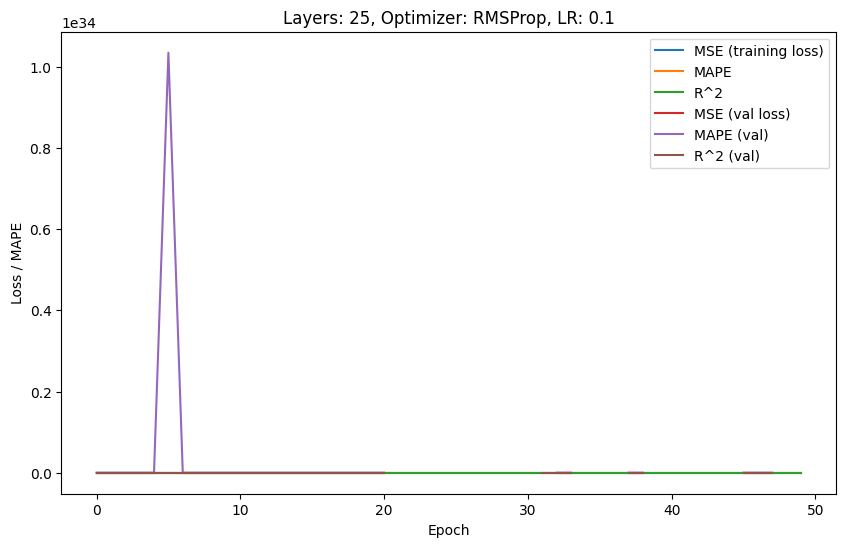

****************************************************************************************************
Layers: 25, Optimizer: RMSProp, LR: 0.01
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 35.3813 - mape: 44.2520 - mse: 35.3813 - r2_score: -0.4319 - val_loss: 30.1010 - val_mape: 41.8368 - val_mse: 30.1010 - val_r2_score: -0.2083
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 23.9451 - mape: 40.2548 - mse: 23.9451 - r2_score: 0.0339 - val_loss: 21.4334 - val_mape: 37.2023 - val_mse: 21.4334 - val_r2_score: 0.1396
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 16.1020 - mape: 31.0965 - mse: 16.1020 - r2_score: 0.3517 - val_loss: 19.4656 - val_mape: 31.0436 - val_mse: 19.4656 - val_r2_score: 0.2186
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.8870 - mape: 15.7268 - mse: 4.8870 - r2_score: 0.8025 - val_loss: 89480439038040268831058821120.0000 - val_mape: 38164672544768.0000 - val_mse: 89480439038040268831058821120.0000 - val_r

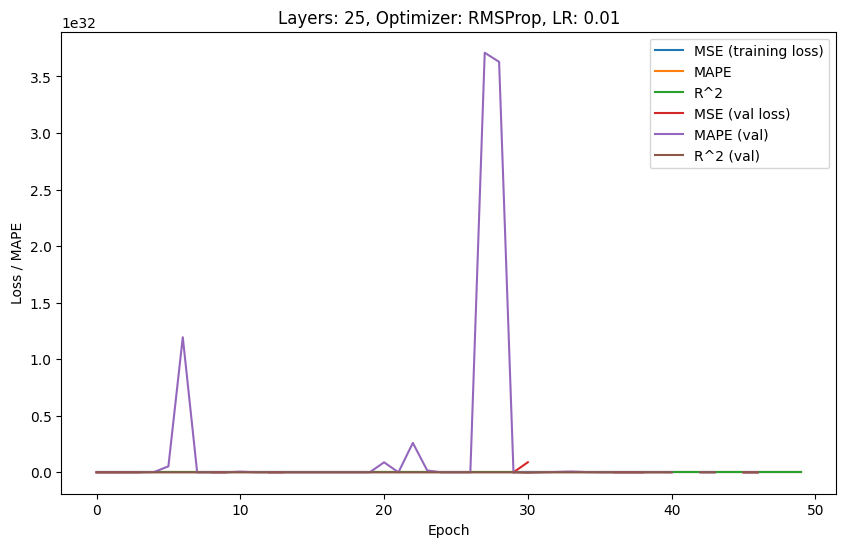

****************************************************************************************************
Layers: 25, Optimizer: RMSProp, LR: 0.001
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 76.3243 - mape: 54.3715 - mse: 76.3243 - r2_score: -2.0719 - val_loss: 139.7846 - val_mape: 57.3088 - val_mse: 139.7846 - val_r2_score: -4.6112
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 25.0683 - mape: 40.4493 - mse: 25.0683 - r2_score: -0.0069 - val_loss: 169.3127 - val_mape: 53.9368 - val_mse: 169.3127 - val_r2_score: -5.7965
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 24.5288 - mape: 40.1569 - mse: 24.5288 - r2_score: 0.0094 - val_loss: 28.0865 - val_mape: 42.6843 - val_mse: 28.0865 - val_r2_score: -0.1274
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 23.9946 - mape: 39.6830 - mse: 23.9946 - r2_score: 0.0290 - val_loss: 27.2202 - val_mape: 43.3765 - val_mse: 27.2202 - val_r2_score: -0.0927
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━

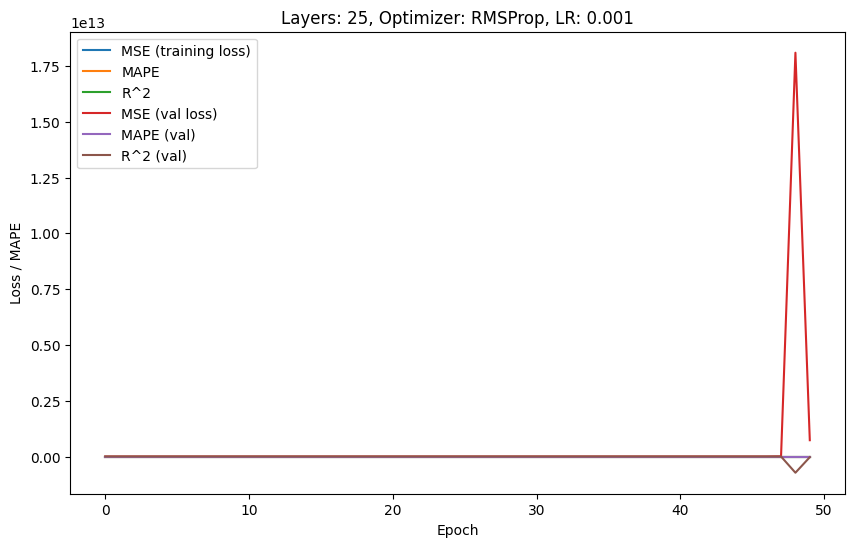

****************************************************************************************************
Layers: 25, Optimizer: Adam, LR: 0.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 28.5421 - mape: 41.5541 - mse: 28.5421 - r2_score: -0.1688 - val_loss: inf - val_mape: 987404346410598051872768.0000 - val_mse: inf - val_r2_score: 0.0000e+00
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 24.0761 - mape: 40.4006 - mse: 24.0761 - r2_score: 0.0330 - val_loss: inf - val_mape: 281627253430062967741743104.0000 - val_mse: inf - val_r2_score: 0.0000e+00
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 23.0225 - mape: 38.7446 - mse: 23.0225 - r2_score: 0.0717 - val_loss: inf - val_mape: 66320041247621966496782090240.0000 - val_mse: inf - val_r2_score: 0.0000e+00
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 18.2369 - mape: 34.6423 - mse: 18.2369 - r2_score: 0.2635 - val_loss: inf - val_mape: 40642171887251619840000.0000 - val_mse: inf -

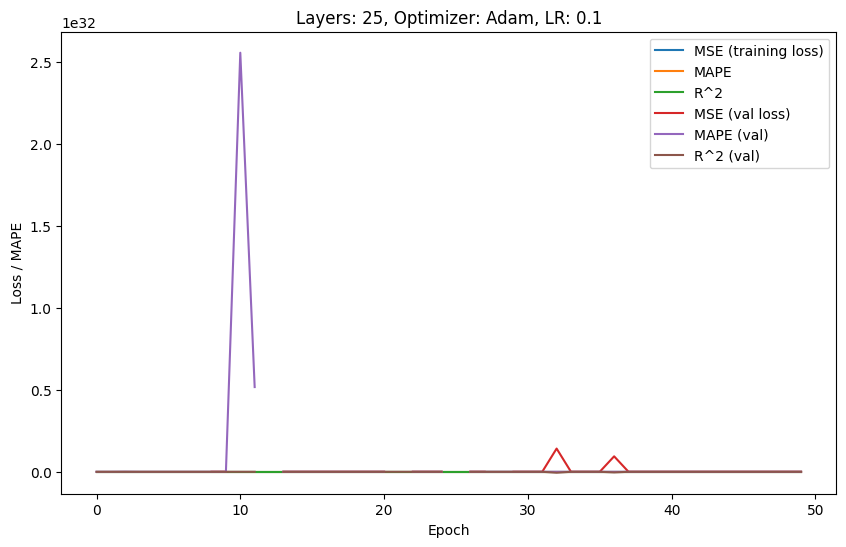

****************************************************************************************************
Layers: 25, Optimizer: Adam, LR: 0.01
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 38.1660 - mape: 44.2580 - mse: 38.1660 - r2_score: -0.5365 - val_loss: 29.7864 - val_mape: 42.5945 - val_mse: 29.7864 - val_r2_score: -0.1957
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 23.9723 - mape: 40.2867 - mse: 23.9723 - r2_score: 0.0357 - val_loss: 23.6382 - val_mape: 40.4853 - val_mse: 23.6382 - val_r2_score: 0.0511
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 22.9031 - mape: 39.1370 - mse: 22.9031 - r2_score: 0.0767 - val_loss: 20.9611 - val_mape: 39.6174 - val_mse: 20.9611 - val_r2_score: 0.1586
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 19.6693 - mape: 36.5356 - mse: 19.6693 - r2_score: 0.2108 - val_loss: 21.1764 - val_mape: 36.6800 - val_mse: 21.1764 - val_r2_score: 0.1499
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/st

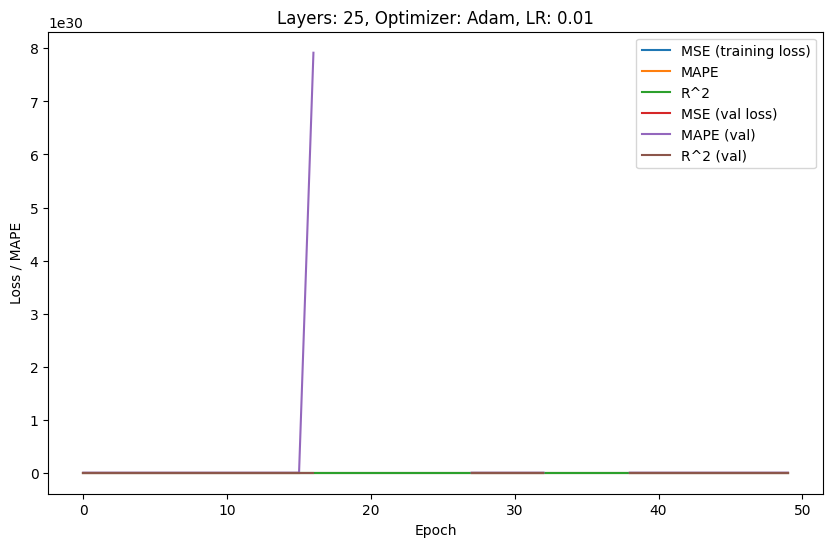

****************************************************************************************************
Layers: 25, Optimizer: Adam, LR: 0.001
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 88.8484 - mape: 57.8417 - mse: 88.8484 - r2_score: -2.5372 - val_loss: 292.3815 - val_mape: 67.7120 - val_mse: 292.3815 - val_r2_score: -10.7367
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 24.9959 - mape: 40.5052 - mse: 24.9959 - r2_score: -0.0095 - val_loss: 236.5676 - val_mape: 65.9478 - val_mse: 236.5676 - val_r2_score: -8.4963
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 24.6422 - mape: 40.7920 - mse: 24.6422 - r2_score: 0.0074 - val_loss: 86.4810 - val_mape: 52.1522 - val_mse: 86.4810 - val_r2_score: -2.4715
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 24.6887 - mape: 40.7142 - mse: 24.6887 - r2_score: 0.0067 - val_loss: 147.9355 - val_mape: 59.6457 - val_mse: 147.9355 - val_r2_score: -4.9384
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━

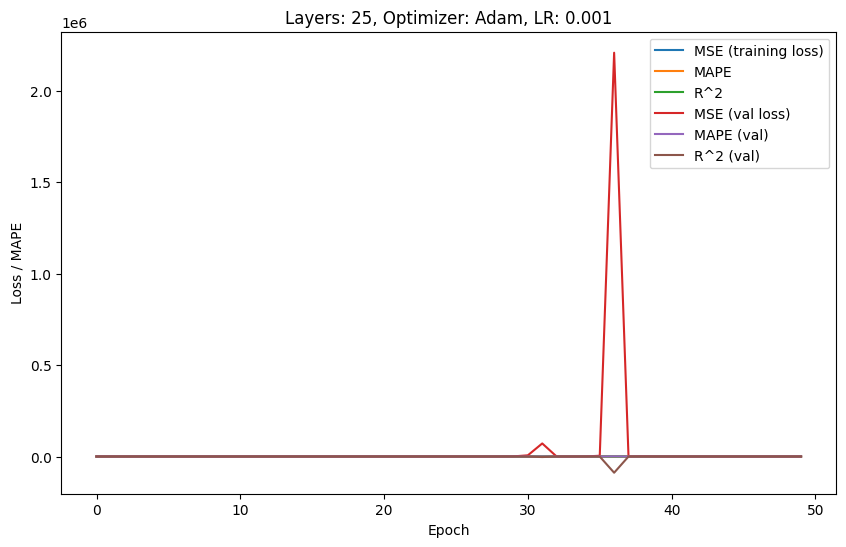

In [73]:
for layers in layers_options:
    for optimizer_name, Optimizer in optimizers_options.items():
        for lr in learning_rates:
          title = f"Layers: {layers}, Optimizer: {optimizer_name}, LR: {lr}"  #, R^2: {r_square:.2f}"
          print('*' * 100)
          print(title)
          model = define_model(layers, Optimizer, lr)
          history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
          plot_learning_curves(history, title)

# Results

The results clearly suggest that the most optimal architecture for given dataset is 5-layer DNN with learning rate 0.001 and the Adam optimizer.
 We clearly observe that SGD has a tendency to suffer from exploding gradient with nets that larger than 5 layers. Experiments with gradient clipping, batch norms and regularization didn't lead to satisfing results as the average accuracy for all models suffers, even despite the fact that exploding gradient went away with those tricks being used.  
 The Adam optimizer is much better in that regard, although it also can behave unpredictably when nets are largge. 
 The learning rate of 0.1 is obviously to high all of the nets, as loss curves look like sinus waves instead of smooth convergense. Lr of 0.001 does lead to slower convergence, but manage to deliver much better results than both 0.1 and 0.01.
 Almost every 1 layer DNN overfitted. 
 Most of the nets with 5 layer had R^2 score ~0.93 which can be considered a decent result I guess. 
  